In [1]:
# Importing essential libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# To read csv file 
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# To display/discribe stats about data from the dataset
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
# To draw information about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#checking for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
print(df['Fuel_Type'].value_counts())
print(df['Selling_type'].value_counts())
print(df['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [7]:
ft = df['Fuel_Type']
st = df['Selling_type']
tt = df['Transmission']
sp = df['Selling_Price']

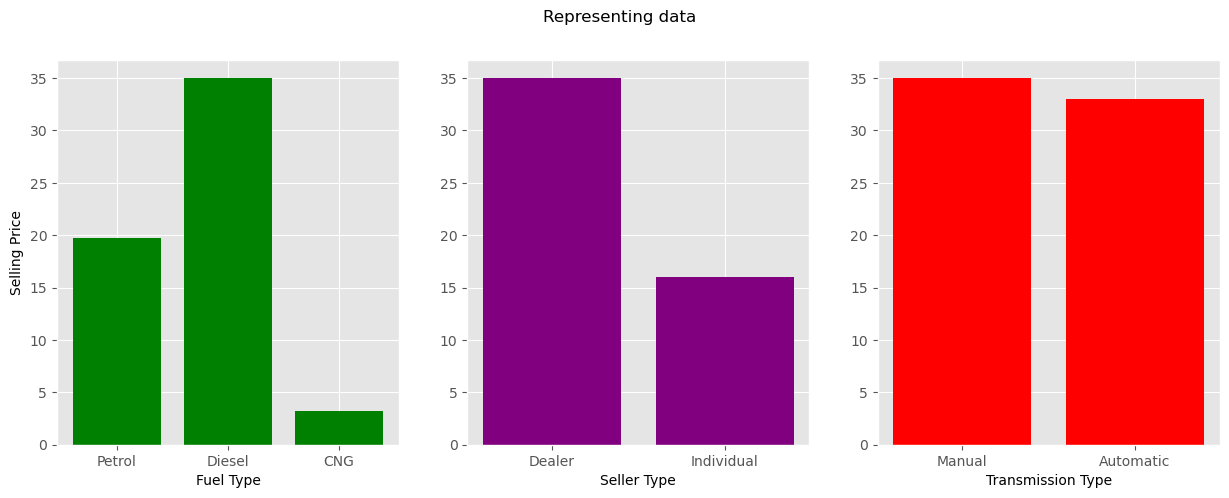

In [8]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Representing data') 
plt.subplot(1,3,1)
plt.bar(ft,sp, color='green')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.subplot(1,3,2)
plt.bar(st,sp, color='purple')
plt.xlabel('Seller Type')
plt.subplot(1,3,3)
plt.bar(tt,sp, color='red')
plt.xlabel('Transmission Type')
plt.show()

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

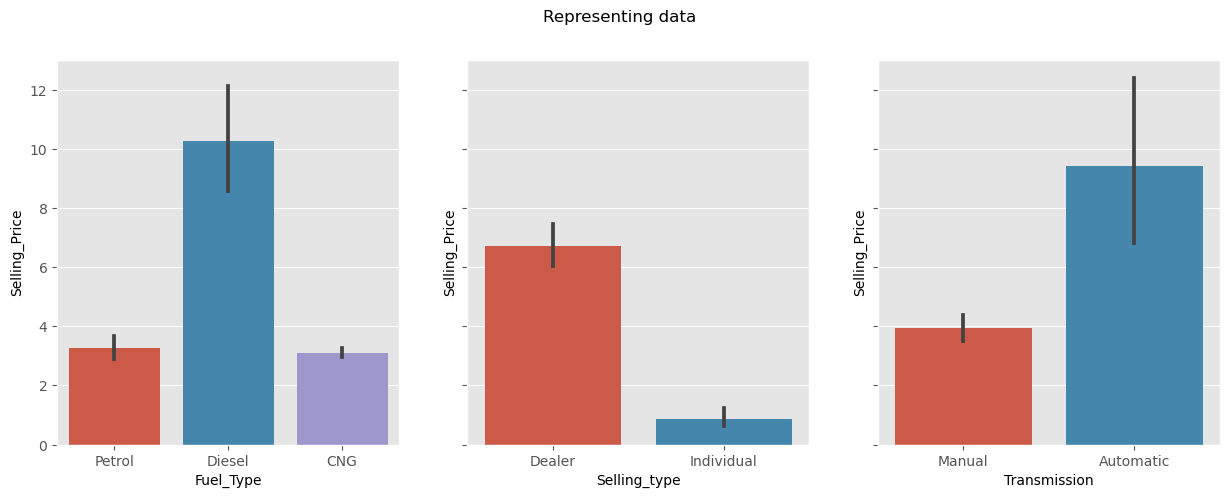

In [9]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Representing data')
sns.barplot(x=ft , y=sp , ax=axes[0])
sns.barplot(x=st , y=sp , ax=axes[1])
sns.barplot(x=tt , y=sp , ax=axes[2])


In [10]:
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
df = pd.get_dummies(df, columns=['Selling_type', 'Transmission'], drop_first=True)

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Owner,Selling_type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


C:\Users\Roshma\AppData\Local\Temp\ipykernel_10276\1153063408.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')


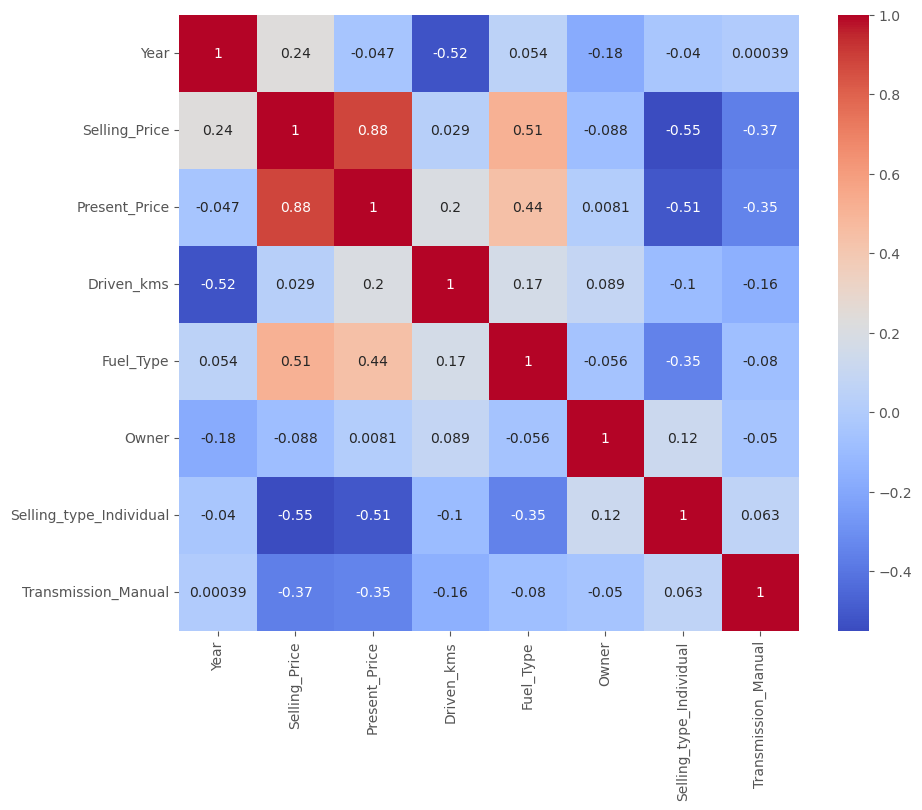

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.show()

In [13]:
X = df.drop(['Car_Name','Selling_Price'], axis=1)
y = df['Selling_Price'] 

In [14]:
print(X.shape)
print(y.shape)

(301, 7)
(301,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [16]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (210, 7)
X_test: (91, 7)
y_train: (210,)
y_test: (91,)


In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
pred = model.predict(X_test)

In [22]:
print('mae:', (metrics.mean_absolute_error(pred, y_test)))
print('mse:', (metrics.mean_squared_error(pred, y_test)))
print('r2s:', (metrics.r2_score(pred, y_test)))

mae: 1.2581987927234457
mse: 3.49536888601346
r2s: 0.8293505189461543


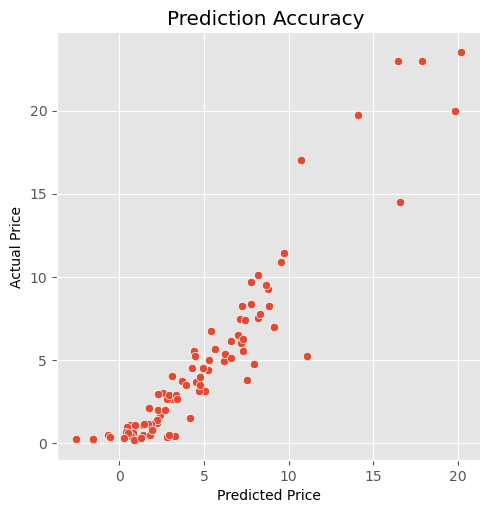

In [23]:
sns.relplot(x=pred, y=y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Prediction Accuracy ')
plt.show()